# Visualizing Results

We have trained multiple models with different variations. Let's visualise and compare them on a granular level.

In this notebook, we will plot and compare the following :

  1. Standard Model Train-Dev Loss v/s Normalised Model Train-Dev Loss
  2. Stand Model Dev Precision-Recall v/s Normalised Model Precision-Recall

In [1]:
# Let's mount our G-Drive. Hey !! Because for GPU you now give your data to Google 

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Let's import our packages !

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [0]:
# Base Path of the Project

path = '/content/drive/My Drive/ICDMAI_Tutorial/notebook/'

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


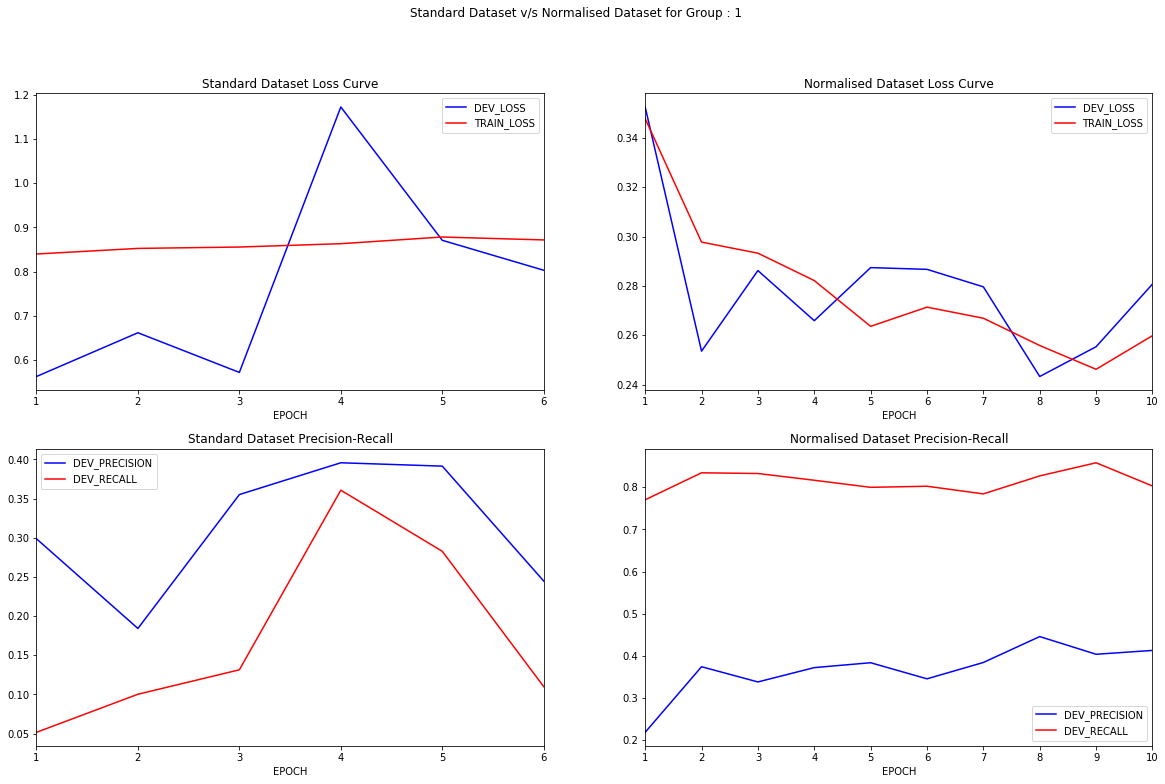

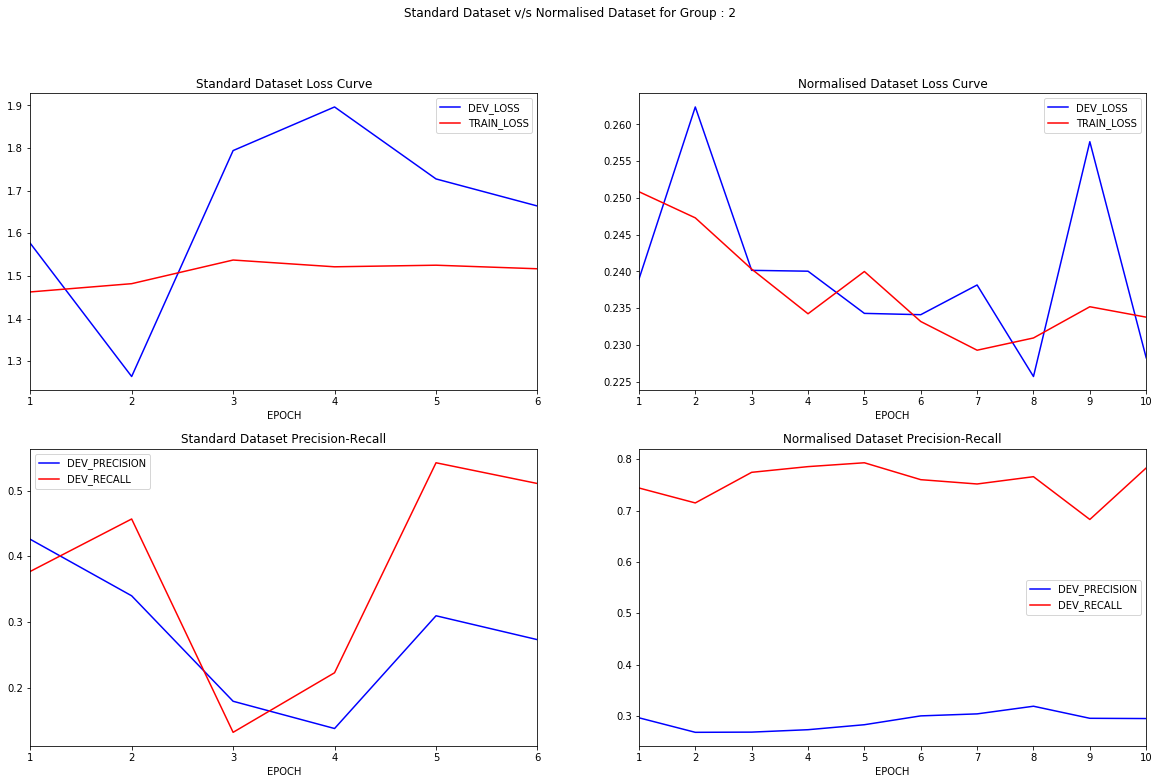

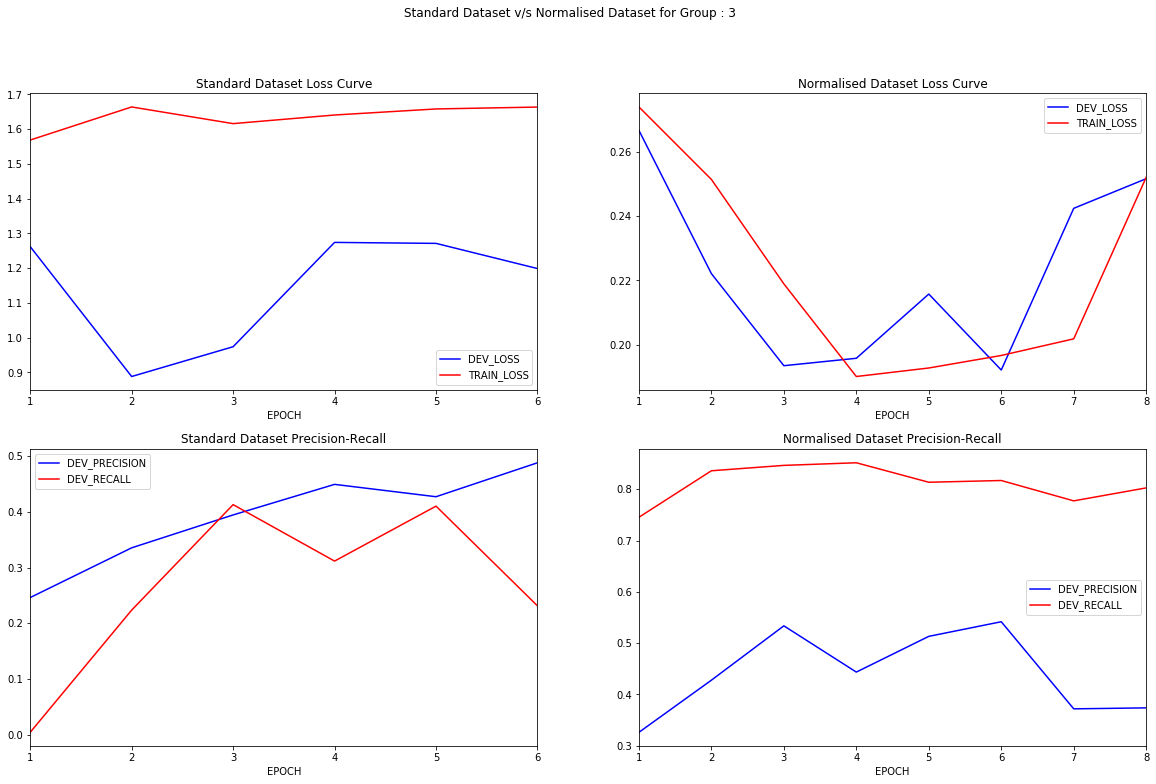

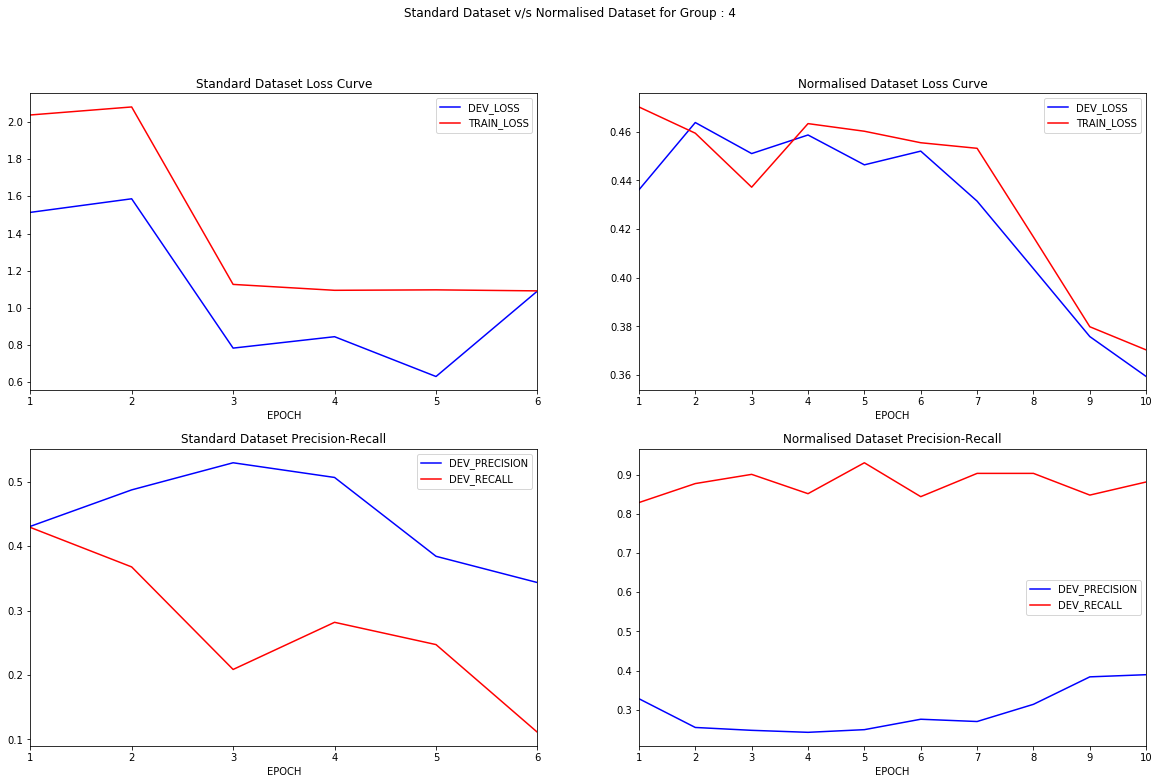

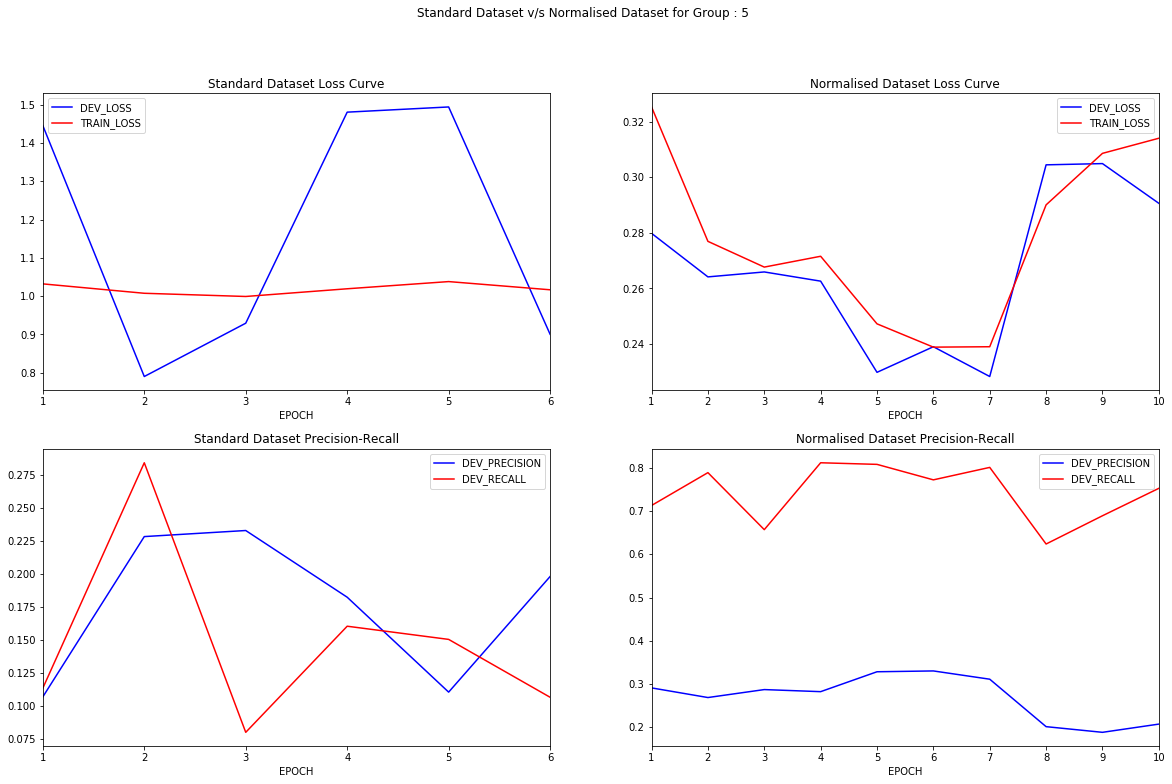

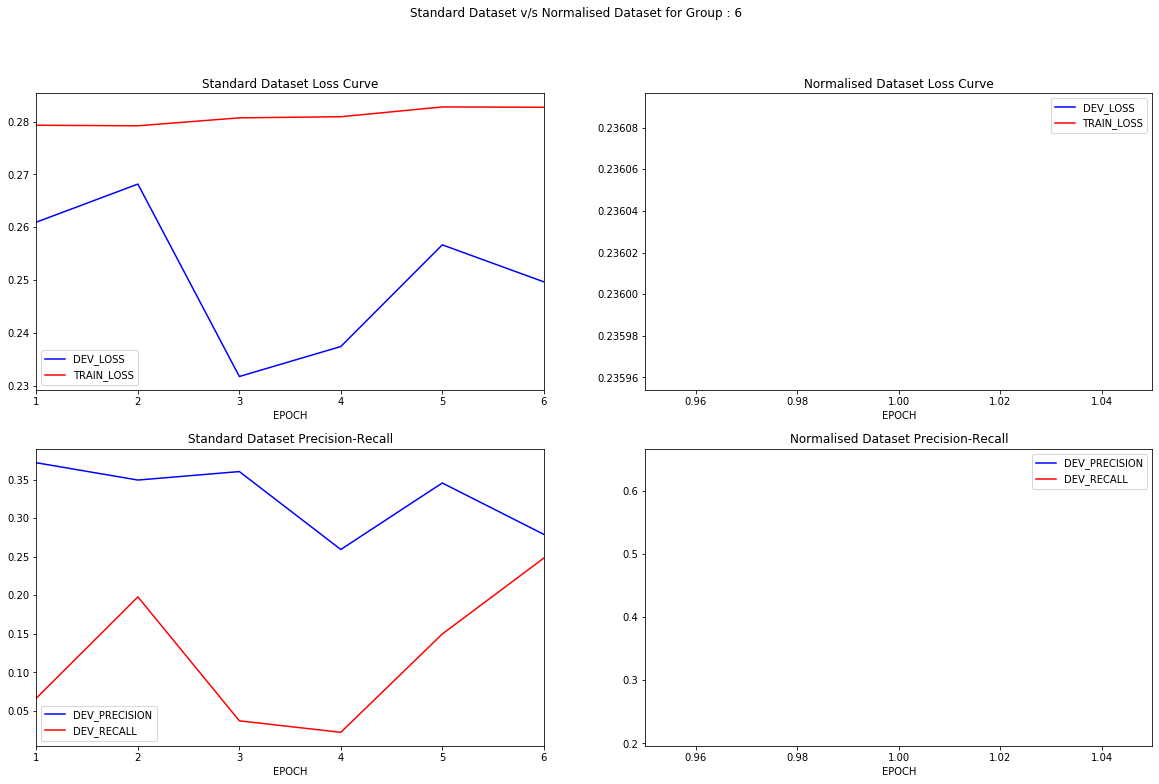

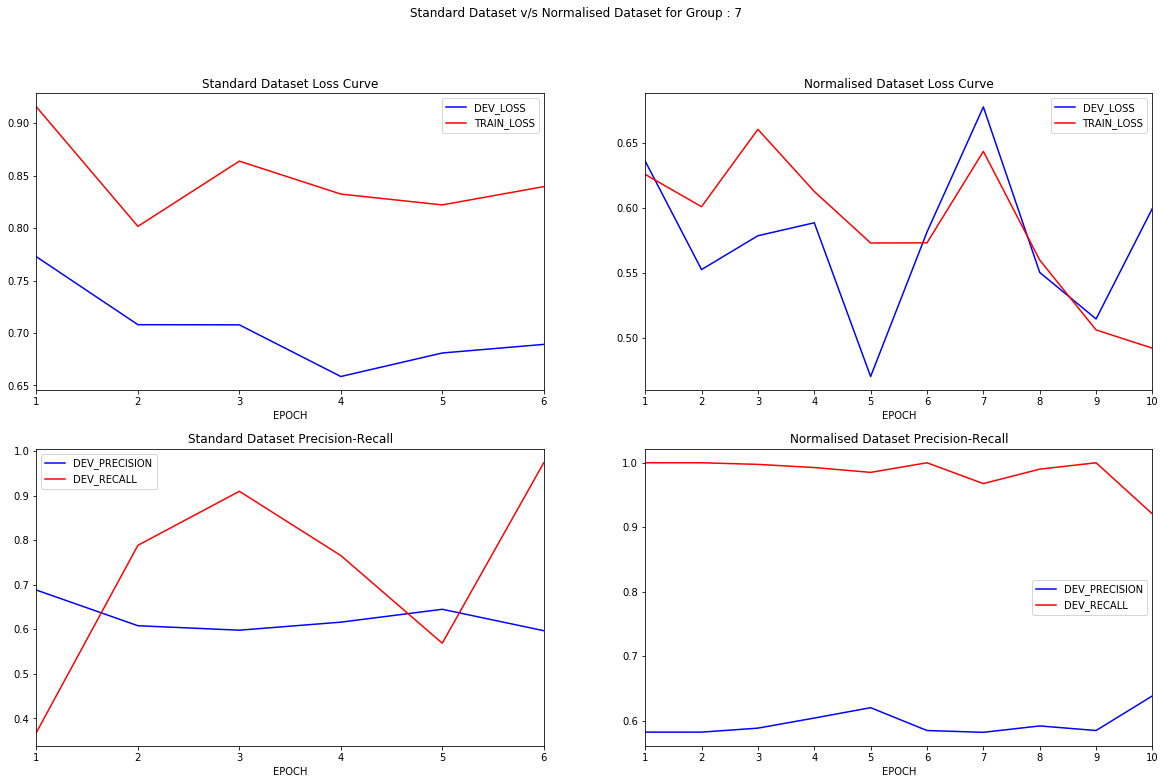

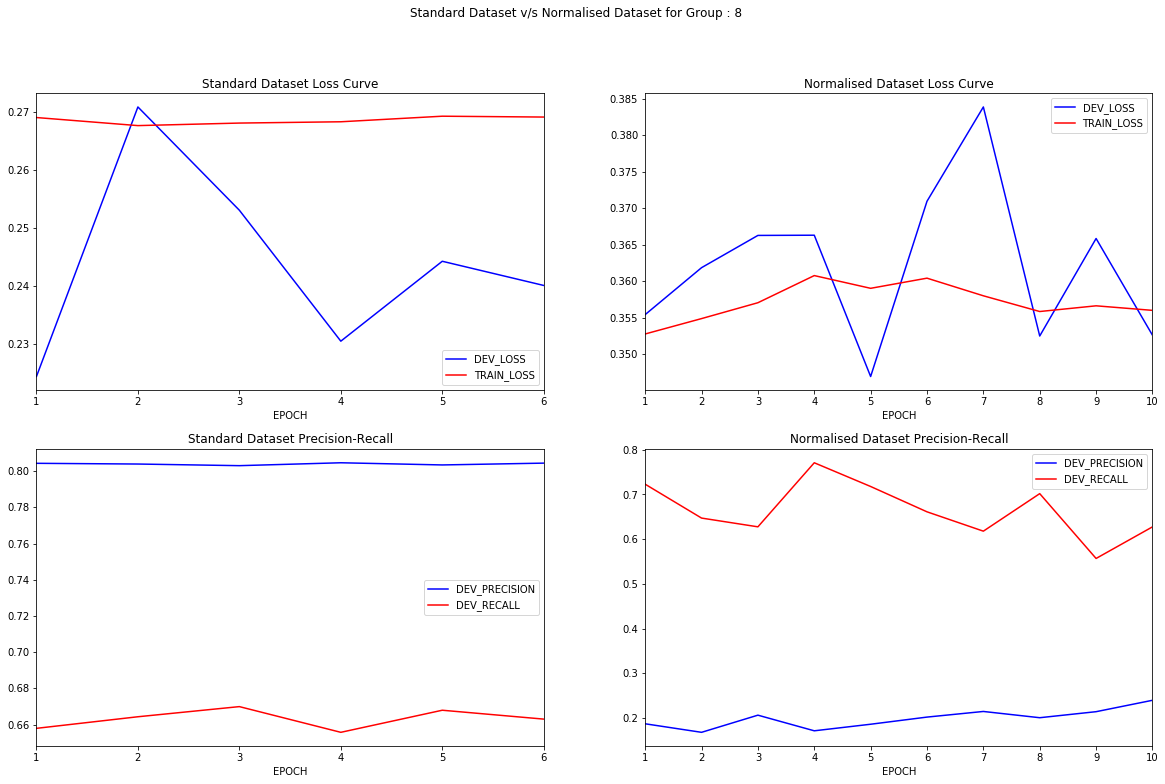

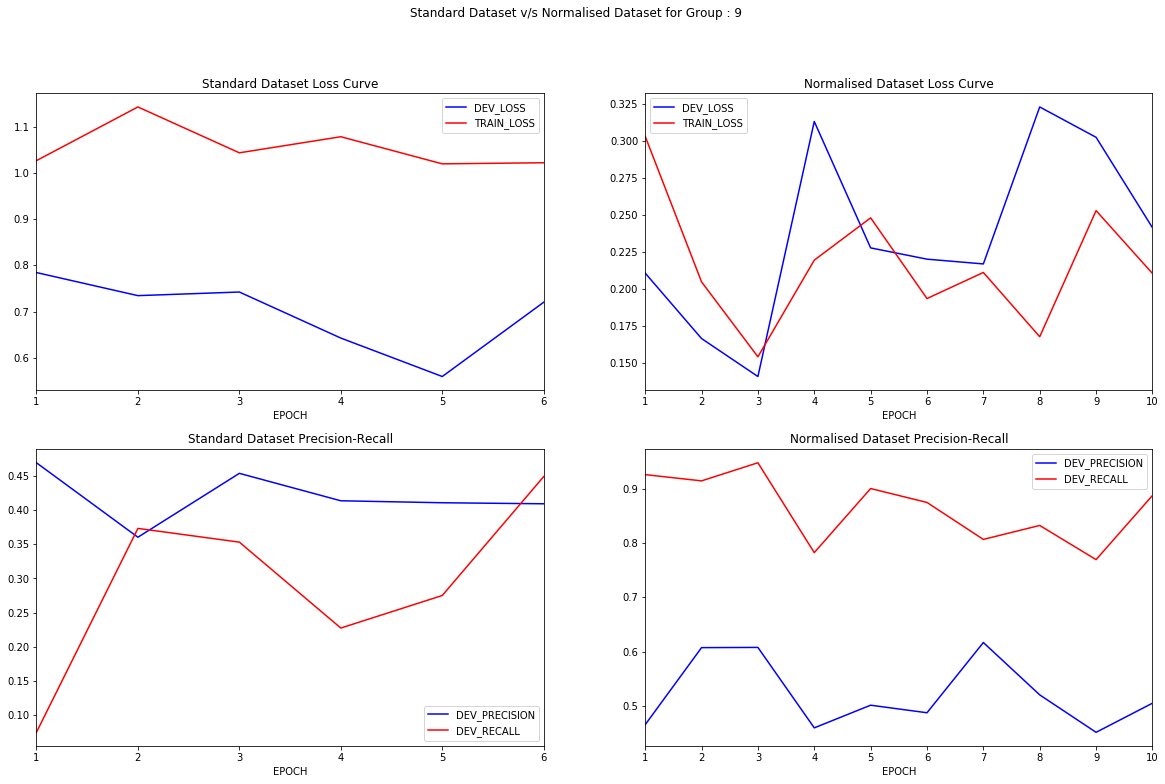

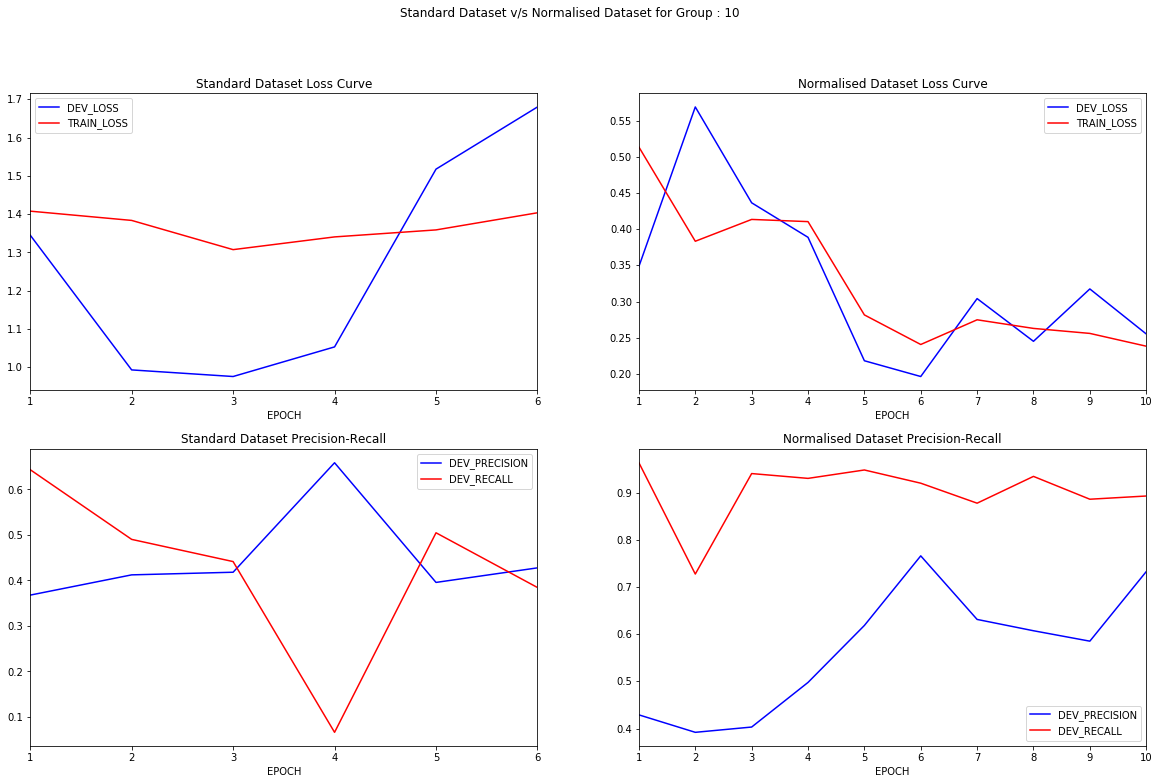

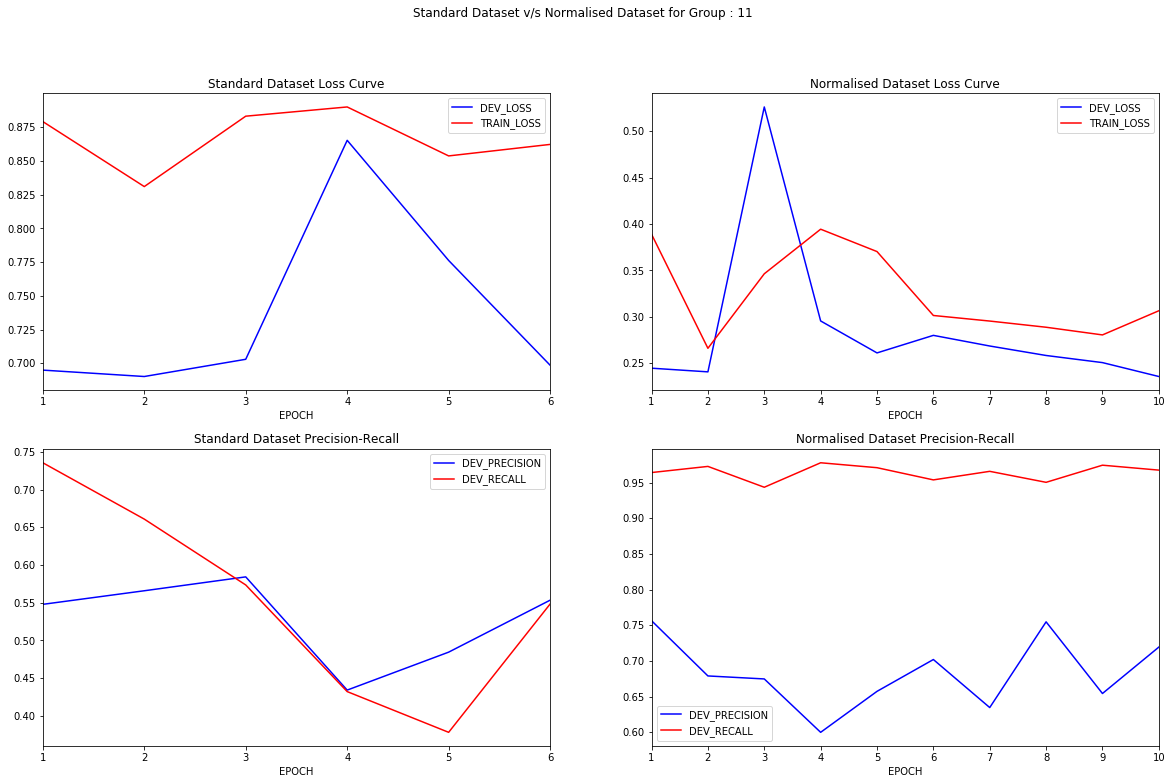

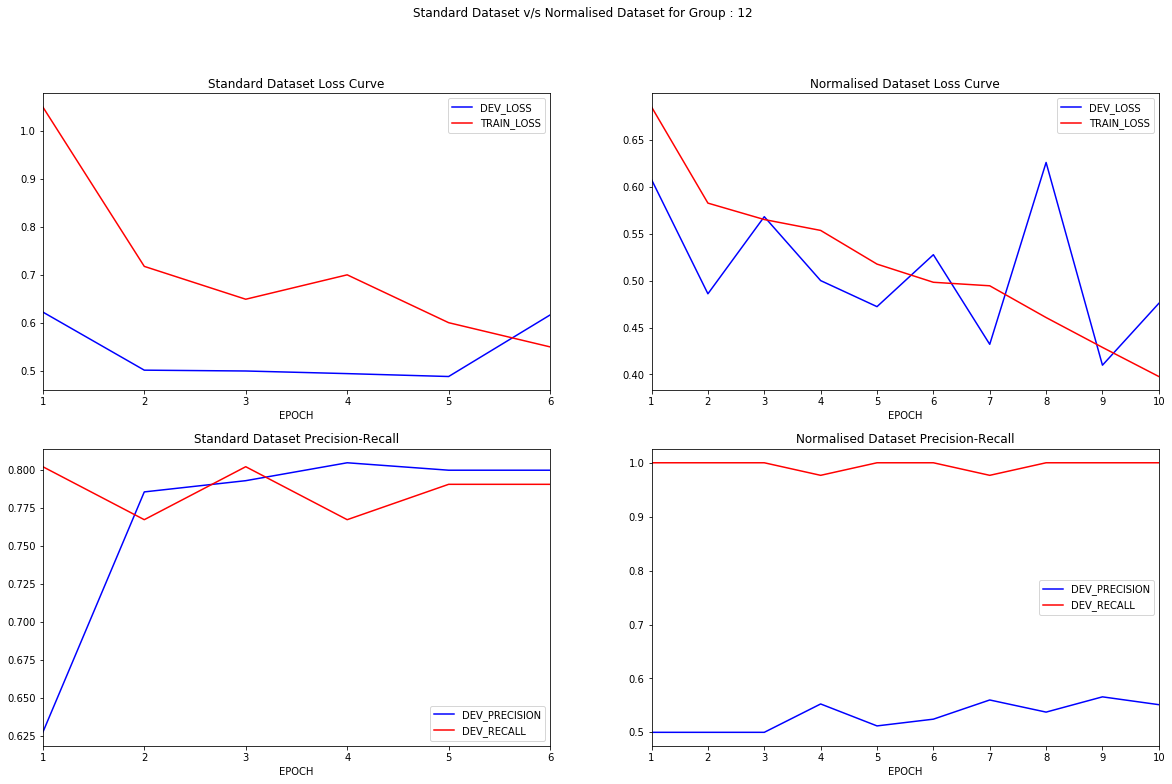

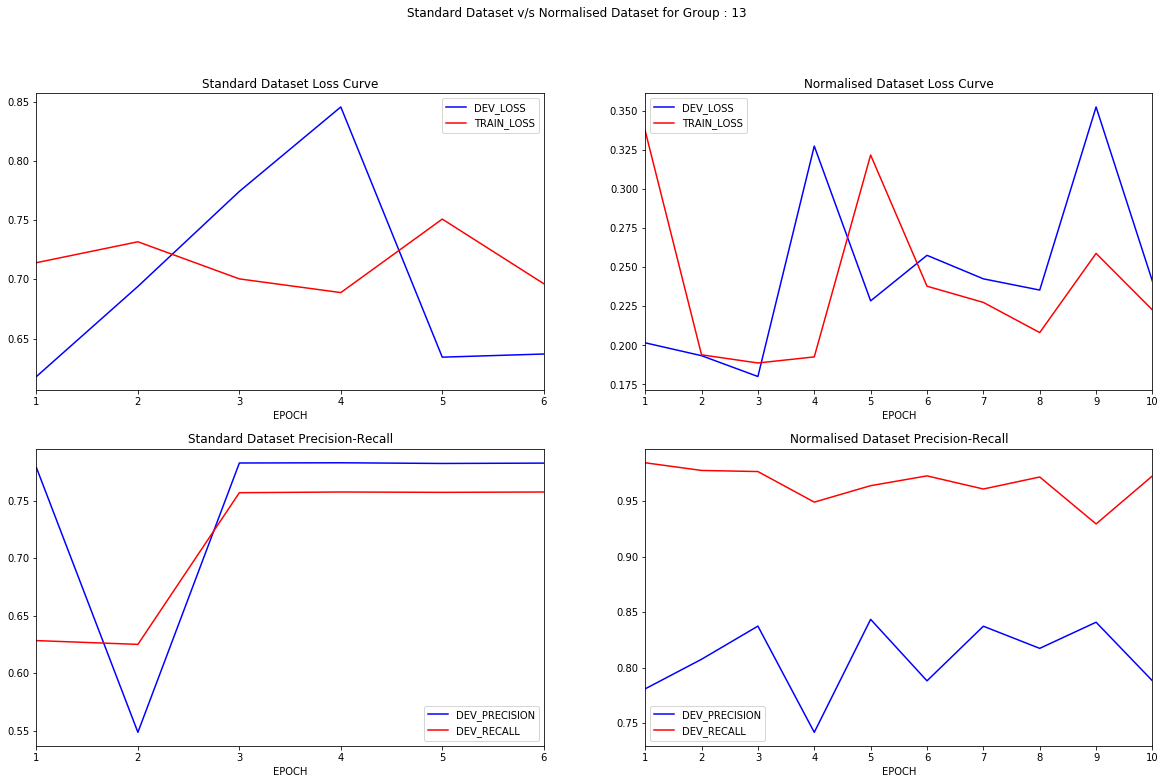

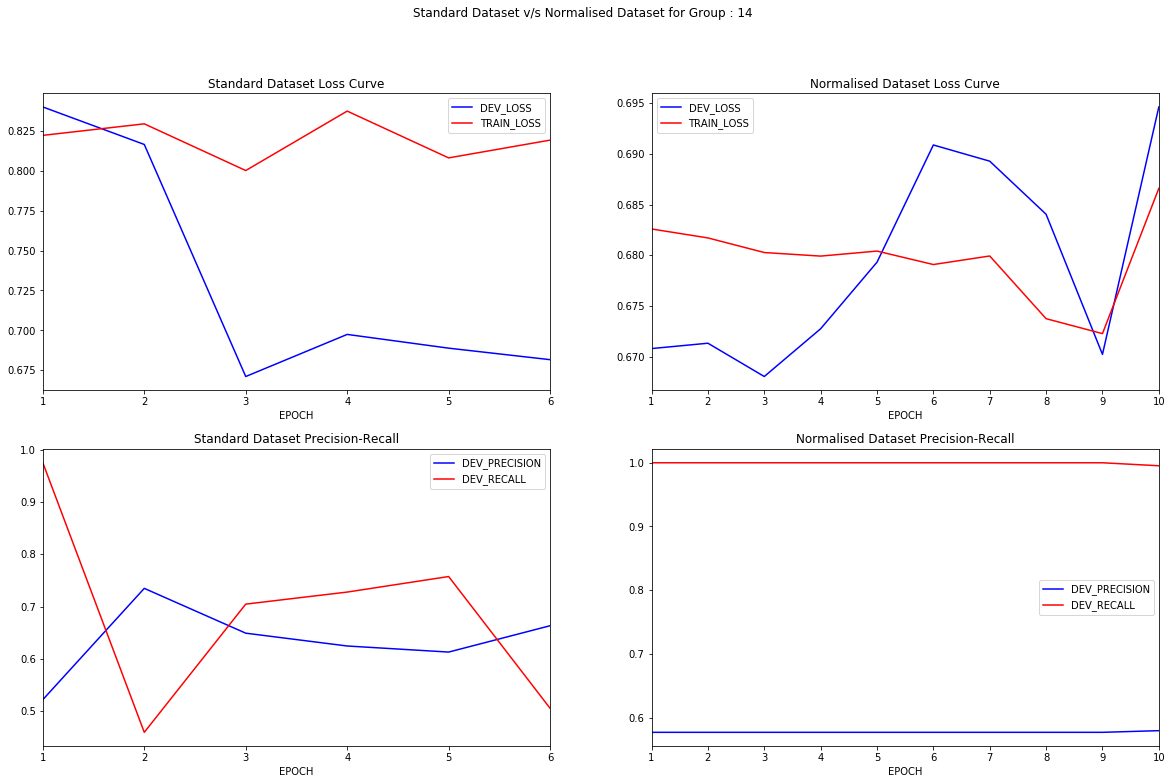

In [61]:
#  Iterate over each group to granualarly plot curves

for grp_id in range(1,15) :
  
  # print("=============================================")
  # print("Group ID  : {}".format(grp_id))
  # print("=============================================")
  
  # Check if the data exists
  standard_data = 'training_data/group/' + str(grp_id) 
  normalised_data = 'training_data/normalised_training_data/group/' + str(grp_id) 

  standard_loss_file_path = os.path.join(path,standard_data,'loss.tsv')
  normalised_loss_file_path = os.path.join(path,normalised_data,'loss.tsv')
  
  # If data for any curve is missing  skip that group
  if not os.path.exists(standard_loss_file_path) :
    print("Standard Data Loss not found")
    continue
  
  if not os.path.exists(normalised_loss_file_path) :
    print("Normalised Data Loss not found")
    continue
  
  # Read the data
  try :
    standard_loss_df = pd.read_csv(standard_loss_file_path,sep='\t')
    normalised_loss_df = pd.read_csv(normalised_loss_file_path,sep='\t')
  except :
    print("File corrupt...")

  # Divide the Figure to 4 sub-plot
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,12))

  plot_title = 'Standard Dataset v/s Normalised Dataset for Group : {}'.format(grp_id)
  fig.suptitle(plot_title)

  # Plot 1  : Standard Model Train-Dev Loss Curve
  standard_loss_df.plot(kind='line',x='EPOCH',y='DEV_LOSS',color='blue',ax=ax1, title= "Standard Dataset Loss Curve",grid=True)
  standard_loss_df.plot(kind='line',x='EPOCH',y='TRAIN_LOSS', color='red', ax=ax1)

  # Plot 2  : Normalised Model Train-Dev Loss Curve
  normalised_loss_df.plot(kind='line',x='EPOCH',y='DEV_LOSS',color='blue',ax=ax2,title= "Normalised Dataset Loss Curve")
  normalised_loss_df.plot(kind='line',x='EPOCH',y='TRAIN_LOSS', color='red', ax=ax2)

  # Plot 3  : Standard Model Precision-Recall Curve
  standard_loss_df.plot(kind='line',x='EPOCH',y='DEV_PRECISION',color='blue',ax=ax3,title= "Standard Dataset Precision-Recall")
  standard_loss_df.plot(kind='line',x='EPOCH',y='DEV_RECALL', color='red', ax=ax3)

  # Plot 4  : Normalised Model Precision-Recall Curve
  normalised_loss_df.plot(kind='line',x='EPOCH',y='DEV_PRECISION',color='blue',ax=ax4,title= "Normalised Dataset Precision-Recall")
  normalised_loss_df.plot(kind='line',x='EPOCH',y='DEV_RECALL', color='red', ax=ax4)
  

  # print("=============================================")